Dataset: [https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#)

In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def get_data(file_path):
    df = pd.read_csv(file_path)
    x = df[['age', 'gender', 'education', 'country', 'ethnicity', 'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impulsive', 'ss']]
    y = df['cannabis']
    x = np.array(x)
    y = np.array(y)
    return x, y

In [3]:
def train_test_split(x, y):
    n_samples = x.shape[0]
    n_train = int(n_samples * 0.7)
    n_test = n_samples - n_train
    perm = np.random.permutation(n_samples)
    train_indx = perm[:n_train]
    test_indx = perm[n_train:]
    data_x_train, data_y_train = x[train_indx,:], y[train_indx]
    data_x_test, data_y_test = x[test_indx,:], y[test_indx]
    return data_x_train, data_y_train, data_x_test, data_y_test

In [4]:
x, y = get_data('data/data_cannabis_7.csv')
data_x_train, data_y_train, data_x_test, data_y_test = train_test_split(x, y)
data_x_train.shape, data_y_train.shape, data_x_test.shape, data_y_test.shape

((1319, 12), (1319,), (566, 12), (566,))

In [5]:
x.shape[0]

1885

## Custom MLP

#### Train and evaluate custom implemented MLP
We are predicting level of cannabis consumption using neural net implemented in numpy.  
There are 7 classes: 
* Never Used
* Used over a Decade Ago
* Used in Last Decade
* Used in Last Year
* Used in Last Month
* Used in Last Week
* Used in Last Day  

Note: Here we show only the best results obtained after tuning hyperparameters. We tried different batch sizes, first_hid_dim and second_hid_dim dimentions, learning rates and number_of_iterations.  

Epoch: 0, Loss: 1.903429163480931
Epoch: 20, Loss: 1.844345185980224
Epoch: 40, Loss: 1.78952171558866
Epoch: 60, Loss: 1.7387848699040296
Epoch: 80, Loss: 1.691992210905546
Epoch: 100, Loss: 1.6490013982473295
Epoch: 120, Loss: 1.6097335266766017
Epoch: 140, Loss: 1.5741143763913632
Epoch: 160, Loss: 1.5420790031242286
Epoch: 180, Loss: 1.513560010156725
Train acc: 0.29037149355572406
Test acc: 0.31095406360424027


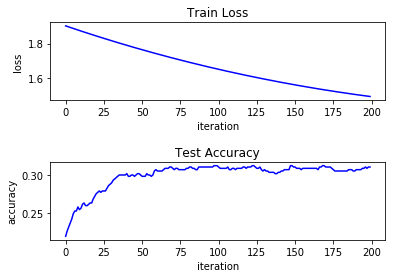

In [51]:
from main import main as train_custom_net
train_custom_net(
    dataset_filename='data_cannabis_7.csv',
    input_dim=12,
    first_hid_dim=25,
    second_hid_dim=15,
    output_dim=7,
    learning_rate=1e-2,
    batch_size=32,
    number_of_iterations=200
)

Different hyperparams

Epoch: 0, Loss: 1.9524606491535392
Epoch: 150, Loss: 1.9159533592678
Epoch: 300, Loss: 1.8813213813747294
Epoch: 450, Loss: 1.8484917484974461
Epoch: 600, Loss: 1.8174092803080117
Epoch: 750, Loss: 1.7880231326545921
Epoch: 900, Loss: 1.760287912742923
Epoch: 1050, Loss: 1.734155419399244
Epoch: 1200, Loss: 1.709596734095376
Epoch: 1350, Loss: 1.6865546436819097
Train acc: 0.3199393479909022
Test acc: 0.3374558303886926


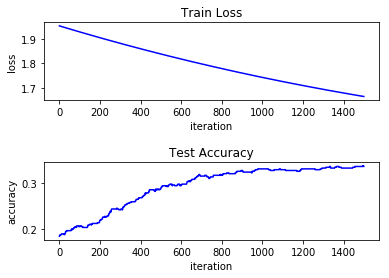

In [66]:
train_custom_net(
    dataset_filename='data_cannabis_7.csv',
    input_dim=12,
    first_hid_dim=15,
    second_hid_dim=10,
    output_dim=7,
    learning_rate=1e-3,
    batch_size=64,
    number_of_iterations=1500
)

#### Train and evaluate custom implemented MLP
Here we are predicting binary classes of cannabis consumption (*Used* or *Not Used*). 
We use 'Never Used' and 'Used over a Decade Ago' classes as *Not Used* and others as *Used*.  
Note: Here we show only the best results obtained after tuning hyperparameters.

Epoch: 0, Loss: 0.7197140984593056
Epoch: 80, Loss: 0.7061249649923242
Epoch: 160, Loss: 0.6928674323589114
Epoch: 240, Loss: 0.6799732032536021
Epoch: 320, Loss: 0.6674269456279772
Epoch: 400, Loss: 0.6552492264226308
Epoch: 480, Loss: 0.6434333527556972
Epoch: 560, Loss: 0.6319572207110813
Epoch: 640, Loss: 0.6208256992892052
Epoch: 720, Loss: 0.6100207826805378
Train acc: 0.731614859742229
Test acc: 0.734982332155477


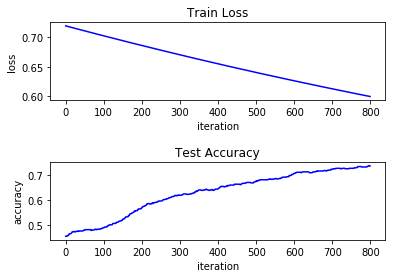

In [42]:
train_custom_net(
    dataset_filename='data_cannabis_2.csv',
    input_dim=12,
    first_hid_dim=25,
    second_hid_dim=15,
    output_dim=2,
    learning_rate=1e-3,
    batch_size=32,
    number_of_iterations=800
)

## PyTorch MLP

Implementation of same neural net architecture and same prediction tasks using PyTorch framework

In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
dtype_np = np.float64
dtype_torch = torch.FloatTensor

In [79]:
class Net(nn.Module):
    def __init__(self, dim_in, dim_hidden_1, dim_hidden_2, dim_out):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(dim_in, dim_hidden_1)
        self.fc2 = nn.Linear(dim_hidden_1, dim_hidden_2)
        self.fc3 = nn.Linear(dim_hidden_2, dim_out)
        self.Ws = torch.eye(dim_in, dim_hidden_2)


    def forward(self, x):
        out1 = F.tanh(self.fc1(x))
        out2 = F.relu(self.fc2(out1))
        out3 = F.softmax(self.fc3(out2 + x @ self.Ws))
        return out3

In [80]:
def train_using_pytorch(model, learning_rate, n_iteration):
    logger = {}
    logger['iteration'] = []
    logger['loss_iteration'] = []

    for t in range(n_iteration):  

        # forward pass
        y_pred = model(x)

        # compute loss
        loss = criterion(y_pred, y)
        # backprop
        loss.backward()

        # update weights using gradient descent  
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data 

        # manually zero the gradients
        model.zero_grad()  

        # reporting & logging       
        if t % 100 == 0:
            print(t, loss.item())

        logger['iteration'] += [t]
        logger['loss_iteration'] += [loss.item()]

In [81]:
def predict(x, model):
    t = torch.from_numpy(x).type(dtype_torch)
    forward_pass = model(t)
    return np.argmax(forward_pass.data.numpy(), axis=1)

In [82]:
def get_accuracy(y, y_pred):
    n_samples = y.shape[0]
    return np.sum(y == y_pred)/n_samples * 100

In [91]:
# get data for 7 classes
x, y = get_data('data/data_cannabis_7.csv')
data_x_train, data_y_train, data_x_test, data_y_test = train_test_split(x, y)
x = torch.from_numpy(data_x_train).type(dtype_torch)
y = torch.from_numpy(data_y_train).type(torch.LongTensor)

# train model for 7 classes
dim_in, dim_hidden_1, dim_hidden_2, dim_out = 12, 25, 15, 7
model = Net(dim_in, dim_hidden_1, dim_hidden_2, dim_out)
criterion = nn.CrossEntropyLoss()

train_using_pytorch(
    model=model,
    learning_rate=1e-2,
    n_iteration=600
)

# evaluate model for 7 classes
y_train_predict = predict(data_x_train, model)
print("PyTorch Train accuracy: %f" % get_accuracy(y_train_predict, data_y_train))

y_test_predict = predict(data_x_test, model)
print("PyTorch Test accuracy: %f" % get_accuracy(y_test_predict, data_y_test))

/home/irko/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


0 1.950331211090088
100 1.9446767568588257
200 1.9383220672607422
300 1.9311171770095825
400 1.9228774309158325
500 1.913469672203064
PyTorch Train accuracy: 32.373010
PyTorch Test accuracy: 31.448763


In [92]:
# get data for 2 classes
x, y = get_data('data/data_cannabis_2.csv')
data_x_train, data_y_train, data_x_test, data_y_test = train_test_split(x, y)
x = torch.from_numpy(data_x_train).type(dtype_torch)
y = torch.from_numpy(data_y_train).type(torch.LongTensor)

# train model for 2 classes
dim_in, dim_hidden_1, dim_hidden_2, dim_out = 12, 25, 15, 2
model = Net(dim_in, dim_hidden_1, dim_hidden_2, dim_out)
criterion = nn.CrossEntropyLoss()

train_using_pytorch(
    model=model,
    learning_rate=1e-3,
    n_iteration=800
)

# evaluate model for 2 classes
y_train_predict = predict(data_x_train, model)
print("PyTorch Train accuracy: %f" % get_accuracy(y_train_predict, data_y_train))

y_test_predict = predict(data_x_test, model)
print("PyTorch Test accuracy: %f" % get_accuracy(y_test_predict, data_y_test))

/home/irko/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


0 0.7103927731513977
100 0.701836347579956
200 0.6935908198356628
300 0.685684323310852
400 0.6781330704689026
500 0.6709488034248352
600 0.6641402840614319
700 0.6577029228210449
PyTorch Train accuracy: 65.504170
PyTorch Test accuracy: 65.547703
